# Project 11 -- SEYI OGUNMODEDE

**INSTRUCTOR:** Dr. Mark Daniel

- Help with videos in figuring out how to write a function.
    
**Collaboration:** 
    


## Question 1

In [1]:
options(jupyter.rich_display = F)

In [2]:
options(repr.matrix.max.cols=100, repr.matrix.max.rows=200)

In [3]:
library(data.table)

In [4]:
county<- fread("/anvil/projects/tdm/data/zillow/County_time_series.csv")
# i input that data set into the variables called county

In [5]:
dim(county)
# to see what it contain
# it has 518791 rows     82 columns

[1] 518791     82

In [6]:
library(lubridate)
# not an error but telling us the various varriable that are in it

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"

Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [7]:
head(county)

  Date       RegionName DaysOnZillow_AllHomes
1 1996-04-30 10001      NA                   
2 1996-04-30 10003      NA                   
3 1996-04-30  1003      NA                   
4 1996-04-30  1009      NA                   
5 1996-04-30  1017      NA                   
6 1996-04-30  1051      NA                   
  InventorySeasonallyAdjusted_AllHomes InventoryRaw_AllHomes
1 NA                                   NA                   
2 NA                                   NA                   
3 NA                                   NA                   
4 NA                                   NA                   
5 NA                                   NA                   
6 NA                                   NA                   
  MedianListingPricePerSqft_1Bedroom MedianListingPricePerSqft_2Bedroom
1 NA                                 NA                                
2 NA                                 NA                                
3 NA                               

In [8]:
head(county$Date)
#it has the format in year, month and day. 

[1] "1996-04-30" "1996-04-30" "1996-04-30" "1996-04-30" "1996-04-30"
[6] "1996-04-30"

In [9]:
month(head(county$Date))
# i can go in and pull off the month

[1] 4 4 4 4 4 4

In [10]:
day(head(county$Date))
# i can go in and pull off the day

[1] 30 30 30 30 30 30

In [11]:
year(head(county$Date))
# i can go in and pull off the day

[1] 1996 1996 1996 1996 1996 1996

In [12]:
tail(county$Date)
# i can check with the tail either way.

[1] "2017-12-31" "2017-12-31" "2017-12-31" "2017-12-31" "2017-12-31"
[6] "2017-12-31"

In [13]:
month(tail(county$Date))
day(tail(county$Date))
year(tail(county$Date))
# to check with the tail, just to verify

[1] 12 12 12 12 12 12

[1] 31 31 31 31 31 31

[1] 2017 2017 2017 2017 2017 2017

In [14]:
county$month <- month(county$Date)
# all of the date column is converted to month
# and it is save in a new column called month and my data frame

In [15]:
county$day <- day(county$Date)
# i will create the same for day

In [16]:
county$year <- year(county$Date)

In [17]:
head(county)

  Date       RegionName DaysOnZillow_AllHomes
1 1996-04-30 10001      NA                   
2 1996-04-30 10003      NA                   
3 1996-04-30  1003      NA                   
4 1996-04-30  1009      NA                   
5 1996-04-30  1017      NA                   
6 1996-04-30  1051      NA                   
  InventorySeasonallyAdjusted_AllHomes InventoryRaw_AllHomes
1 NA                                   NA                   
2 NA                                   NA                   
3 NA                                   NA                   
4 NA                                   NA                   
5 NA                                   NA                   
6 NA                                   NA                   
  MedianListingPricePerSqft_1Bedroom MedianListingPricePerSqft_2Bedroom
1 NA                                 NA                                
2 NA                                 NA                                
3 NA                               

In [18]:
county$mdy <- paste0(county$month, "/", county$day, "/", county$year)
# i could make a column called mdy (county$mdy)
# to do that, i could paste together
# new column is created called mdy

In [19]:
table(county$year)
# to know the number of year in the data frame


 1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  2007  2008 
12794 17905 18806 19070 19199 19323 19579 19826 19972 20141 20406 20478 21103 
 2009  2010  2011  2012  2013  2014  2015  2016  2017 
21385 28911 30544 30820 31071 31278 31605 32169 32406 

In [20]:
length(table(county$year))
# to know the total number, just take the length

[1] 22

In [21]:
head(county$MedianListingPricePerSqft_3Bedroom)
# a lot of them are NA

[1] NA NA NA NA NA NA

In [22]:
tail(county$MedianListingPricePerSqft_3Bedroom)
# take a look at the tail
# it has actual values

[1] 144.5238 162.7458 155.3084 149.9315 150.6260 138.4111

In [23]:
tapply(county$MedianListingPricePerSqft_3Bedroom, county$year, mean)
# take the data in there, split it up according to year and then take the mean
# i get all NA's because every year has some NA values

1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 
  NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA 
2012 2013 2014 2015 2016 2017 
  NA   NA   NA   NA   NA   NA 

In [24]:
tapply(county$MedianListingPricePerSqft_3Bedroom, county$year, mean, na.rm=TRUE)
# i will remove NA's
# it is obvious from 1996 - 2009, i don't have any value.
# the mean calculated were from 2010 - 2017.

    1996     1997     1998     1999     2000     2001     2002     2003 
     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN 
    2004     2005     2006     2007     2008     2009     2010     2011 
     NaN      NaN      NaN      NaN      NaN      NaN 113.3021 106.4380 
    2012     2013     2014     2015     2016     2017 
105.4016 111.2442 115.4661 118.8369 122.5079 128.3419 

In [25]:
tapply(county$MedianListingPricePerSqft_1Bedroom, county$year, mean, na.rm=TRUE)

    1996     1997     1998     1999     2000     2001     2002     2003 
     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN 
    2004     2005     2006     2007     2008     2009     2010     2011 
     NaN      NaN      NaN      NaN      NaN      NaN 239.0062 217.1000 
    2012     2013     2014     2015     2016     2017 
213.7414 223.3347 232.3262 253.4574 263.9213 271.7585 

In [26]:
f <- tapply(county$MedianListingPricePerSqft_3Bedroom, county$year, mean, na.rm=TRUE)

In [27]:
k <- tapply(county$MedianListingPricePerSqft_1Bedroom, county$year, mean, na.rm=TRUE)

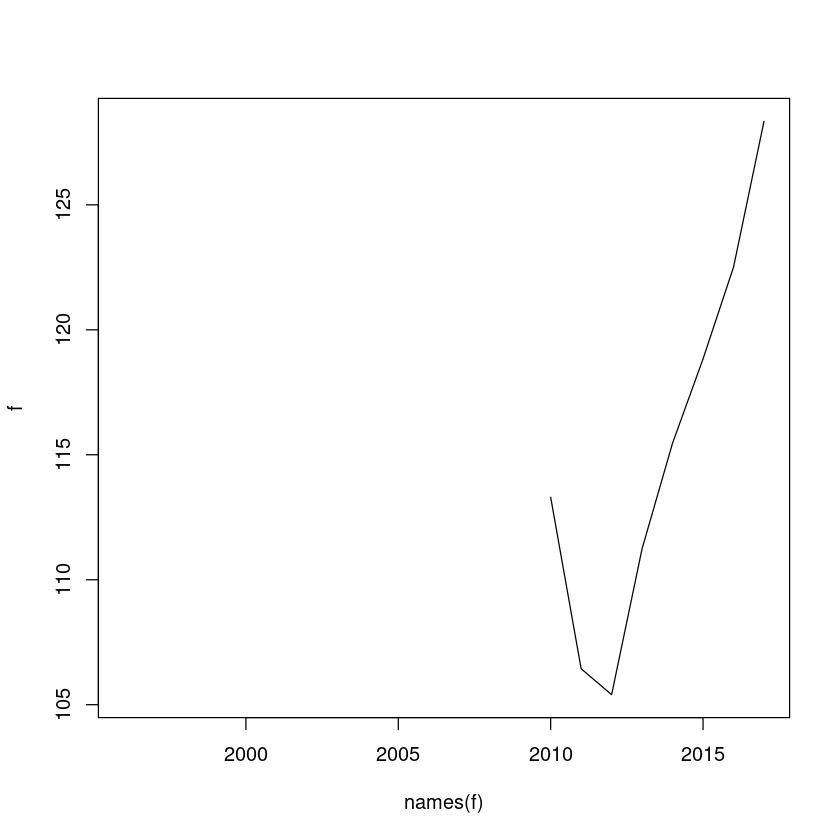

In [28]:
plot(names(f), f, type = "l")
lines (names (k), k,type = "l")
# names(f) - which is the year, f - numerical values
# i can plot on top of f by changing it to line
# from the shape seen, the difficulties is that the limit on the y values are set by the first outcome there.
# for the f we have its ylimit from (0 - 128.3419), while k has ylimit from (o -271.7585)
# f ylimit will now be increased to from 0 -300 to accomodate that

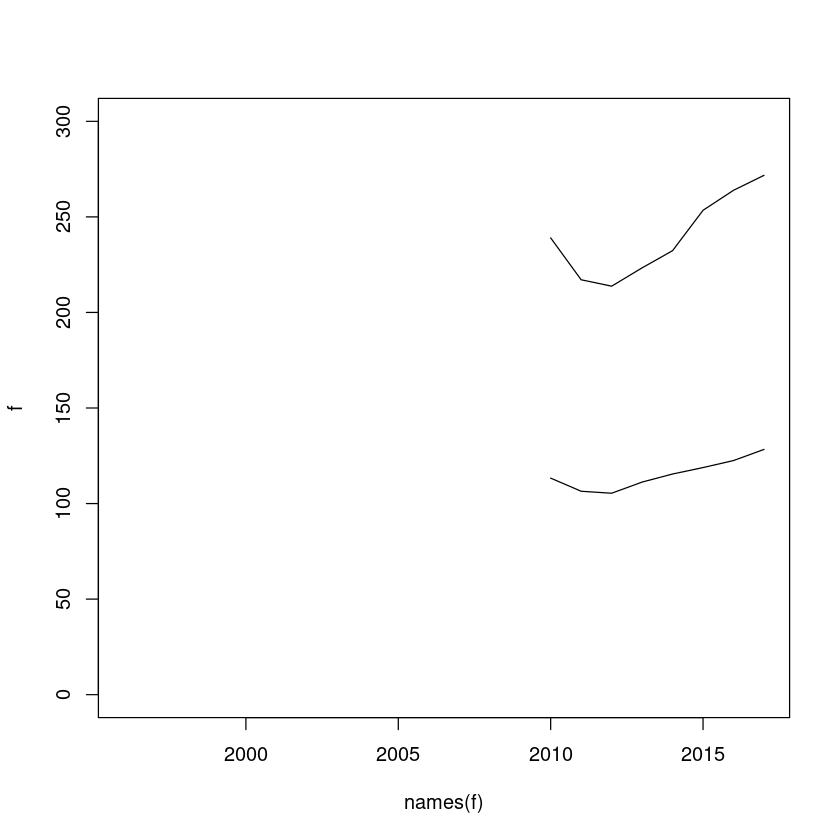

In [29]:
plot(names(f), f, type = "l", ylim=c(0,300))
lines (names (k), k,type = "l")

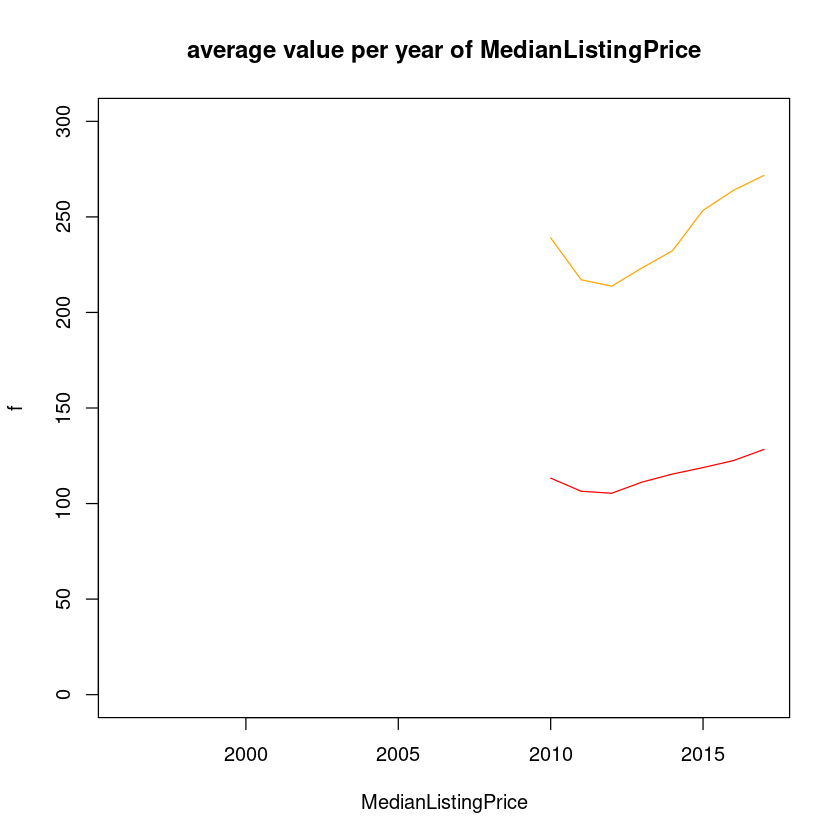

In [70]:
plot(names(f), f, type = "l", ylim=c(0,300),main="average value per year of MedianListingPrice", xlab= "MedianListingPrice", col= c("red"))
lines (names (k), k,type = "l",col= c("orange"))

Convert the Date column to month, date, year format.

How many years are in the data.frame in total?

Create a lineplot that shows the average value per year of MedianListingPricePerSqft_3Bedroom AND shows the average value per year of MedianListingPricePerSqft_1Bedroom.

Write one to two sentences on what you notice in the graph

The graph of k(MedianListingPricePerSqft_1Bedroom)has more dip/steppy than that of f(MedianListingPricePerSqft_3Bedroom), It depict high price for k(MedianListingPricePerSqft_1Bedroom) graph reflecting inflation for small size of bedroom

## Question 2

In [30]:
names(county)
# i want the ones that has tier in them

 [1] "Date"                                                         
 [2] "RegionName"                                                   
 [3] "DaysOnZillow_AllHomes"                                        
 [4] "InventorySeasonallyAdjusted_AllHomes"                         
 [5] "InventoryRaw_AllHomes"                                        
 [6] "MedianListingPricePerSqft_1Bedroom"                           
 [7] "MedianListingPricePerSqft_2Bedroom"                           
 [8] "MedianListingPricePerSqft_3Bedroom"                           
 [9] "MedianListingPricePerSqft_4Bedroom"                           
[10] "MedianListingPricePerSqft_5BedroomOrMore"                     
[11] "MedianListingPricePerSqft_AllHomes"                           
[12] "MedianListingPricePerSqft_CondoCoop"                          
[13] "MedianListingPricePerSqft_DuplexTriplex"                      
[14] "MedianListingPricePerSqft_SingleFamilyResidence"              
[15] "MedianListingPrice_1Bedroom"

In [31]:
grep("ier",names (county))
# to look for tier, i dont know if the t is capitalised or not, therefore, i will look for the ones with "ier"
# i found 3 columns that have ier in them

[1] 73 75 77

In [32]:
names (county)[grep("ier",names (county))]
# to extract their actual names

[1] "ZHVI_BottomTier" "ZHVI_MiddleTier" "ZHVI_TopTier"   

In [33]:
head(county$ZHVI_BottomTier)

[1] 65600 81900 70600    NA    NA    NA

In [34]:
head(county$ZHVI_MiddleTier)

[1]  85700 116800 110600  70000     NA     NA

In [35]:
head(county$ZHVI_TopTier)

[1] 129700 181400 192300 123500     NA     NA

In [36]:
tapply(county$ZHVI_TopTier,county$year, mean, na.rm=TRUE)
# in order to know what is interesting about the data, you need to plot.

    1996     1997     1998     1999     2000     2001     2002     2003 
149657.1 153220.3 160847.4 170195.2 182168.7 193997.8 204287.7 217986.8 
    2004     2005     2006     2007     2008     2009     2010     2011 
237117.5 262079.6 276630.7 277911.1 268666.4 257466.4 237383.0 228135.3 
    2012     2013     2014     2015     2016     2017 
228593.1 235660.7 245301.8 254253.5 263219.7 275637.1 

In [37]:
v <-tapply(county$ZHVI_TopTier,county$year, mean, na.rm=TRUE)

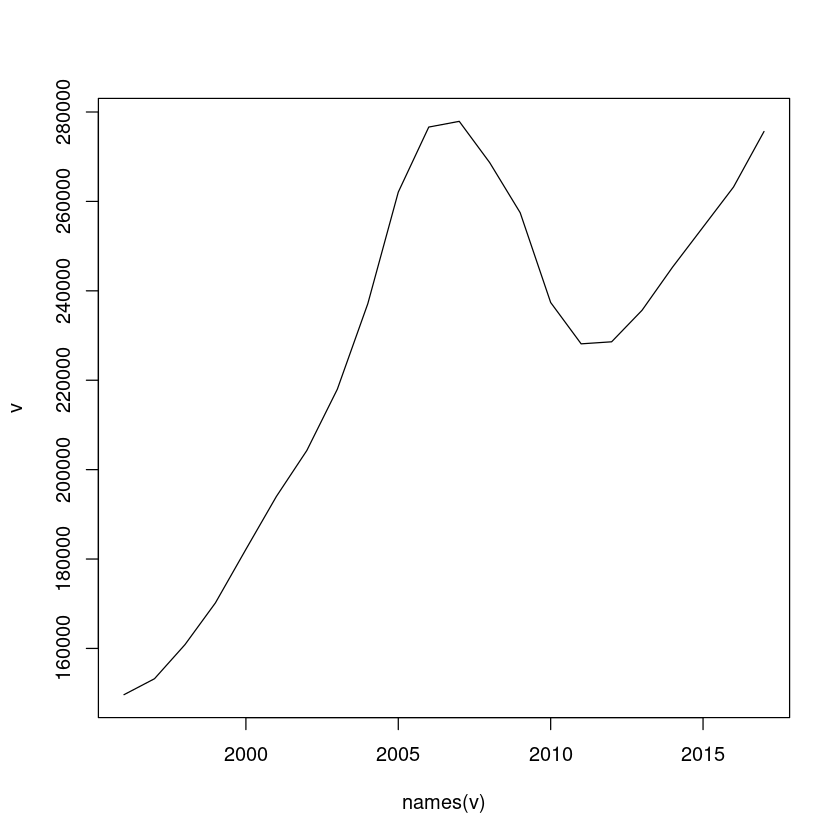

In [38]:
plot(names(v), v, type = "l")

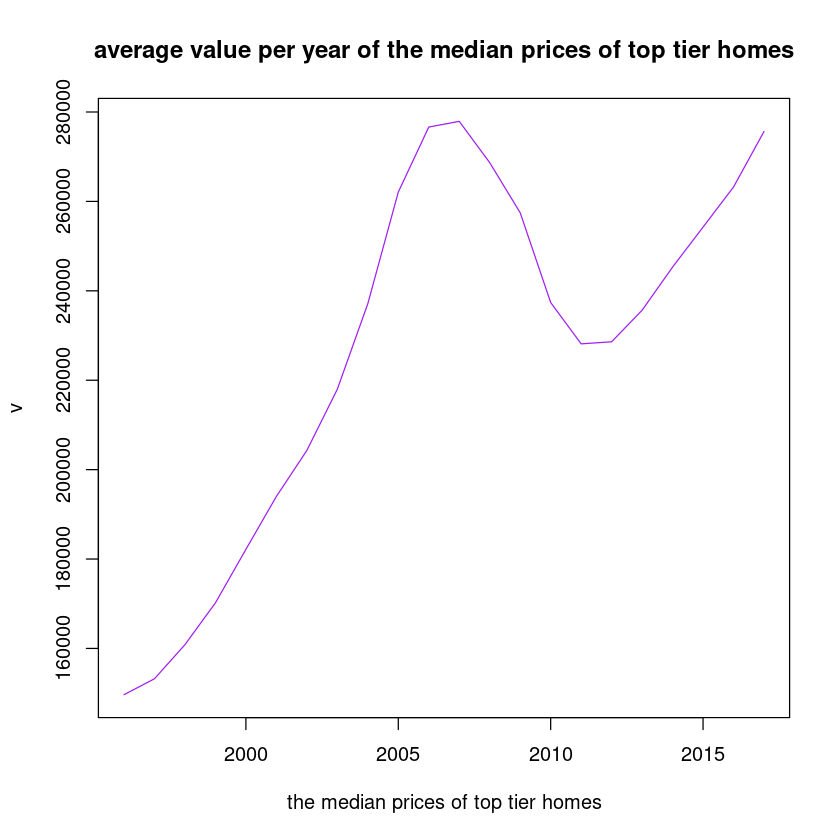

In [71]:
plot(names(v), v, type = "l",main="average value per year of the median prices of top tier homes", 
     xlab= "the median prices of top tier homes", col= c("purple"))

In [39]:
tapply(county$ZHVI_BottomTier,county$year, mean, na.rm=TRUE)["2014"]
# to extract for the year 2014 only

    2014 
98515.35 

In [40]:
mean(county$ZHVI_BottomTier[county$year=="2014"], na.rm=TRUE)
# another way of doing it

[1] 98515.35

In [41]:
tapply(county$ZHVI_BottomTier,county$year, mean, na.rm=TRUE)["2010"]

    2010 
101618.2 

In [42]:
mean(county$ZHVI_BottomTier[county$year=="2010"], na.rm=TRUE)

[1] 101618.2

In [43]:
# tapply(some data here, how to break up the data, a function to apply to each piece of the data)

What is the average value per year of the median prices of top tier homes? 

Write a sentence or two about anything that may seem interesting about this data. it started increasing from year 1996 until year 2010 with reduction and pick up again in the year 2014 till year 2017. If related to economy or sales, the progress flunctuate.

What is the average value of the median of bottom tier homes in 2014?

What is the average value of the median of middle tier homes in 2010?

## Question 3

In [44]:
v <-tapply(county$ZHVI_TopTier,county$year, mean, na.rm=TRUE)

In [45]:
v

    1996     1997     1998     1999     2000     2001     2002     2003 
149657.1 153220.3 160847.4 170195.2 182168.7 193997.8 204287.7 217986.8 
    2004     2005     2006     2007     2008     2009     2010     2011 
237117.5 262079.6 276630.7 277911.1 268666.4 257466.4 237383.0 228135.3 
    2012     2013     2014     2015     2016     2017 
228593.1 235660.7 245301.8 254253.5 263219.7 275637.1 

In [46]:
w <-tapply(county$ZHVI_MiddleTier,county$year, mean, na.rm=TRUE)

In [47]:
w

     1996      1997      1998      1999      2000      2001      2002      2003 
 96498.43  98422.62 102068.37 107461.44 114059.06 121324.76 128138.82 136994.10 
     2004      2005      2006      2007      2008      2009      2010      2011 
149029.88 164915.91 173707.55 173018.17 165196.71 156687.23 144725.43 137878.30 
     2012      2013      2014      2015      2016      2017 
136482.30 141333.70 146389.76 152357.83 159839.23 169282.88 

In [48]:
x <-tapply(county$ZHVI_BottomTier,county$year, mean, na.rm=TRUE)

In [49]:
x

     1996      1997      1998      1999      2000      2001      2002      2003 
 70103.58  70972.25  73359.88  76783.98  81212.09  86265.79  91326.15  98142.64 
     2004      2005      2006      2007      2008      2009      2010      2011 
107430.56 119010.28 125644.02 125330.50 118547.15 110504.53 101618.24  95133.68 
     2012      2013      2014      2015      2016      2017 
 92742.05  95140.22  98515.35 102933.27 109040.48 116971.91 

In [50]:
max(v)
max(w)
max(x)
# because of the ranges of values , i will make ylimit to go from 0 - 300000

[1] 277911.1

[1] 173707.6

[1] 125644

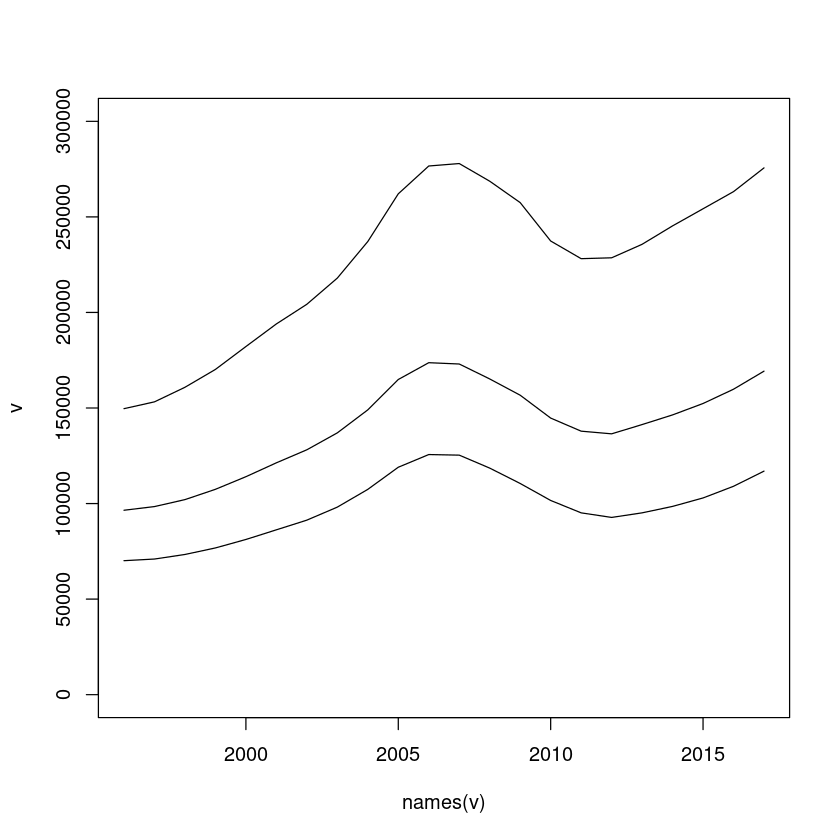

In [51]:
plot(names(v), v, type = "l", ylim = c(0,300000))
lines(names(w), w, type = "l")
lines(names(x), x, type = "l")

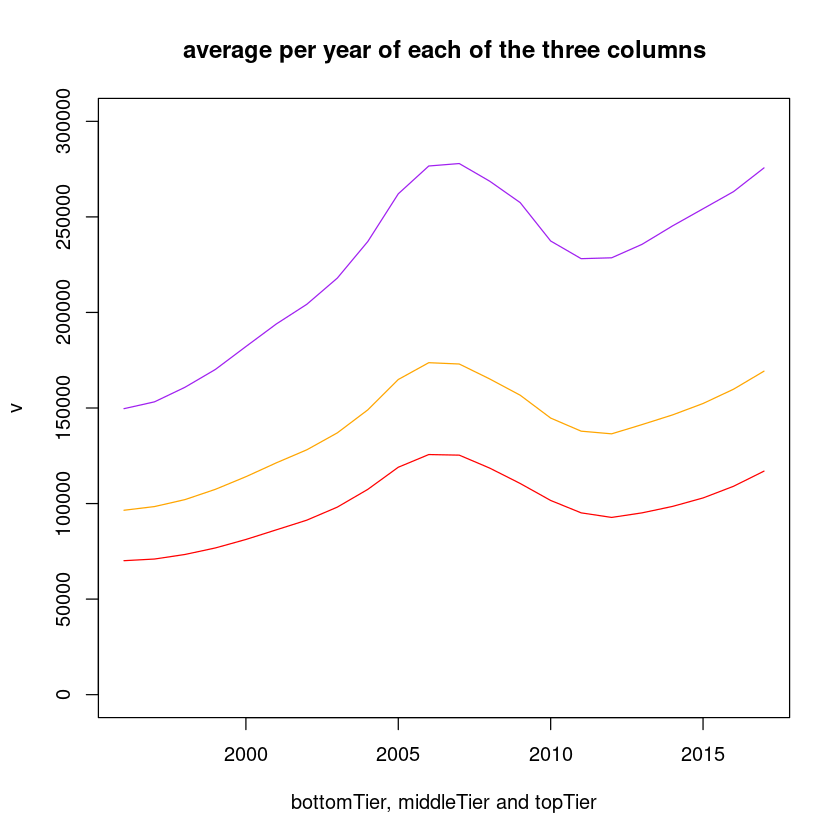

In [74]:
plot(names(v), v, type = "l", ylim = c(0,300000),main="average per year of each of the three columns", 
     xlab= "bottomTier, middleTier and topTier", col= c("purple"))
lines(names(w), w, type = "l",col= c("orange"))
lines(names(x), x, type = "l",col= c("red"))

Can you create a graph that shows the average per year of each of the three columns (bottom tier, middle tier, and top tier), so that you can easily compare these variables?

Their curves are almost same shape but more steepy with v, they follow simmilar pattern of increasing and decreasing but more impact with v.

## Question 4

In [52]:
head(county$MedianRentalPrice_1Bedroom)

[1] NA NA NA NA NA NA

In [53]:
tail(county$MedianRentalPrice_1Bedroom)

[1]  850 1000 1075  925 1200   NA

In [54]:
tapply(county$MedianRentalPrice_1Bedroom, county$year, mean)

1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 
  NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA 
2012 2013 2014 2015 2016 2017 
  NA   NA   NA   NA   NA   NA 

In [55]:
tapply(county$MedianRentalPrice_1Bedroom, county$year, mean, na.rm=TRUE)

     1996      1997      1998      1999      2000      2001      2002      2003 
      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN 
     2004      2005      2006      2007      2008      2009      2010      2011 
      NaN       NaN       NaN       NaN       NaN       NaN 1255.0754  991.0041 
     2012      2013      2014      2015      2016      2017 
 975.9693  994.6484 1031.3652 1092.0310 1112.3224 1056.4197 

In [56]:
tapply(county$MedianRentalPrice_2Bedroom, county$year, mean, na.rm=TRUE)

    1996     1997     1998     1999     2000     2001     2002     2003 
     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN 
    2004     2005     2006     2007     2008     2009     2010     2011 
     NaN      NaN      NaN      NaN      NaN      NaN 1251.445 1095.022 
    2012     2013     2014     2015     2016     2017 
1082.272 1102.277 1126.239 1177.147 1202.825 1159.762 

In [57]:
tapply(county$MedianRentalPrice_3Bedroom, county$year, mean, na.rm=TRUE)

    1996     1997     1998     1999     2000     2001     2002     2003 
     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN 
    2004     2005     2006     2007     2008     2009     2010     2011 
     NaN      NaN      NaN      NaN      NaN      NaN 1376.975 1325.017 
    2012     2013     2014     2015     2016     2017 
1315.319 1350.493 1390.166 1457.668 1486.347 1491.350 

In [58]:
a <- tapply(county$MedianRentalPrice_1Bedroom, county$year, mean, na.rm=TRUE)

In [59]:
a

     1996      1997      1998      1999      2000      2001      2002      2003 
      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN 
     2004      2005      2006      2007      2008      2009      2010      2011 
      NaN       NaN       NaN       NaN       NaN       NaN 1255.0754  991.0041 
     2012      2013      2014      2015      2016      2017 
 975.9693  994.6484 1031.3652 1092.0310 1112.3224 1056.4197 

In [60]:
b<- tapply(county$MedianRentalPrice_2Bedroom, county$year, mean, na.rm=TRUE)

In [61]:
b

    1996     1997     1998     1999     2000     2001     2002     2003 
     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN 
    2004     2005     2006     2007     2008     2009     2010     2011 
     NaN      NaN      NaN      NaN      NaN      NaN 1251.445 1095.022 
    2012     2013     2014     2015     2016     2017 
1082.272 1102.277 1126.239 1177.147 1202.825 1159.762 

In [62]:
c<- tapply(county$MedianRentalPrice_3Bedroom, county$year, mean, na.rm=TRUE)

In [63]:
c

    1996     1997     1998     1999     2000     2001     2002     2003 
     NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN 
    2004     2005     2006     2007     2008     2009     2010     2011 
     NaN      NaN      NaN      NaN      NaN      NaN 1376.975 1325.017 
    2012     2013     2014     2015     2016     2017 
1315.319 1350.493 1390.166 1457.668 1486.347 1491.350 

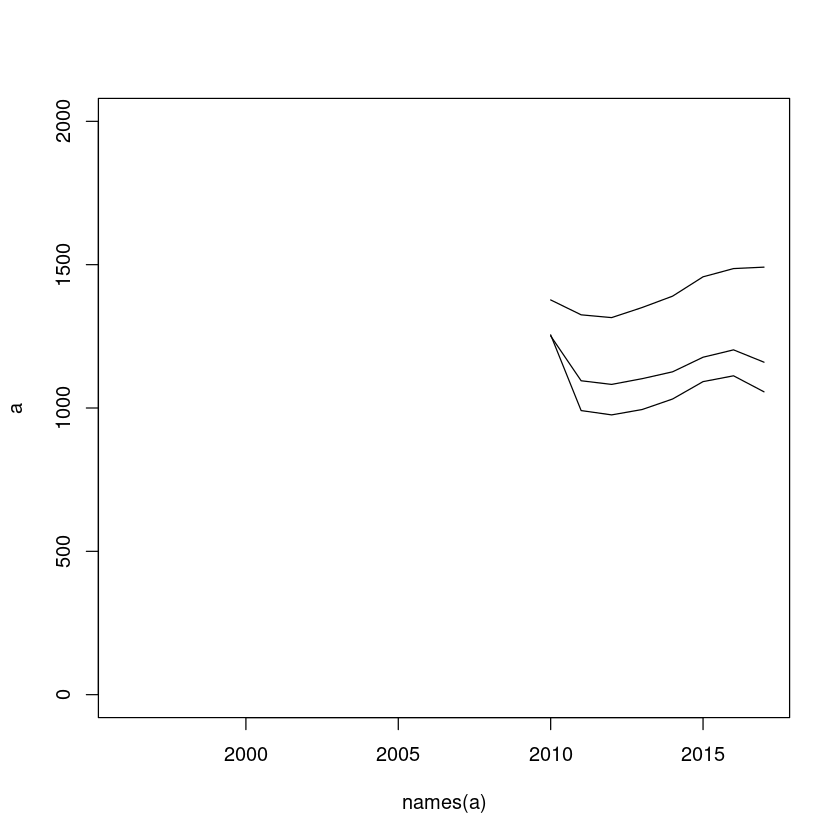

In [64]:
plot(names(a), a, type = "l", ylim=c(0,2000))
lines (names (b), b,type = "l")
lines (names (c), c,type = "l")

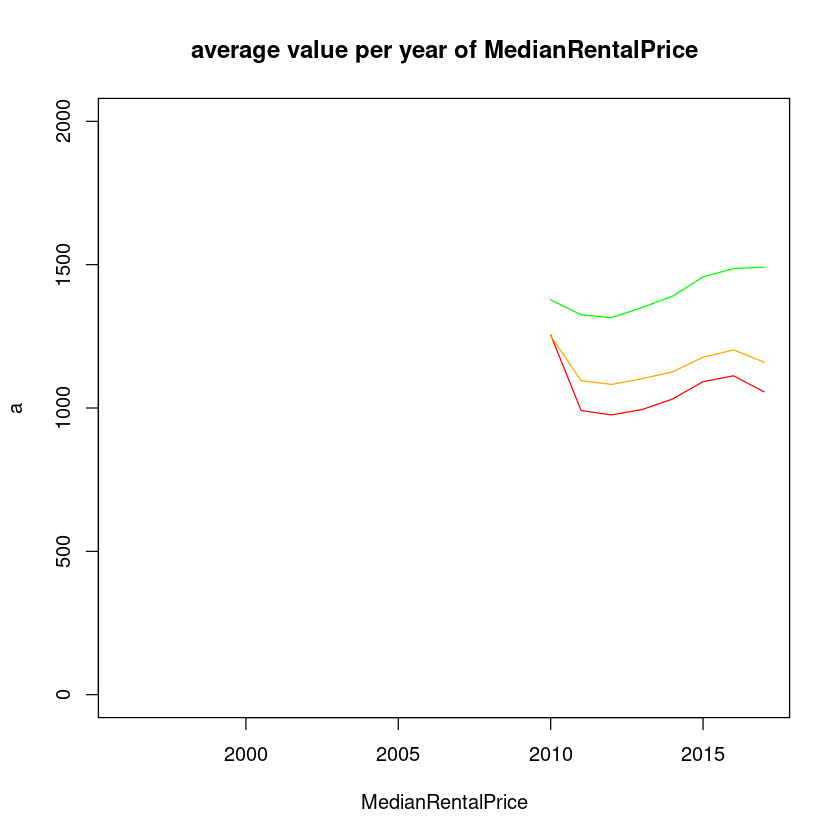

In [76]:
plot(names(a), a, type = "l", ylim=c(0,2000),main="average value per year of MedianRentalPrice", xlab= "MedianRentalPrice", col= c("red"))
lines (names (b), b,type = "l",col= c("orange"))
lines (names (c), c,type = "l",col= c("green"))

Looking at the data, is there something that you find interesting? Create 3 new graphs and explain what you see and why you chose that specific type of plot.

For a and b their values were pretty close for the year 2010, which was obvious on the graph and c shape looks more steepy.  

## Question 5

In [65]:
# code here

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.